In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/guest/Документы/medstats/src/cxs')

import regressions as rgr

# https://dasha.ai/en-us/blog/auc-roc
# https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand
# https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9

In [14]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,1,1,1,0,1,1])

In [15]:
roc_auc_score(y, x)

0.8800000000000001

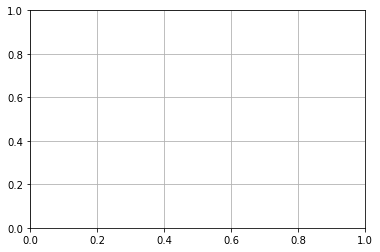

In [16]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.show()

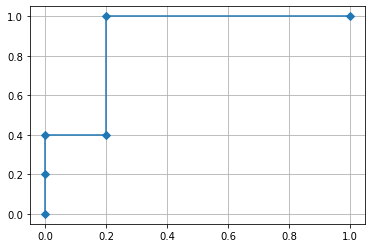

In [24]:
a = np.array([0. , 0. , 0. , 0.2, 0.2, 1. ])
b = np.array([0. , 0.2, 0.4, 0.4, 1. , 1. ])

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.plot(a,b, marker='D')
plt.grid()
plt.show()

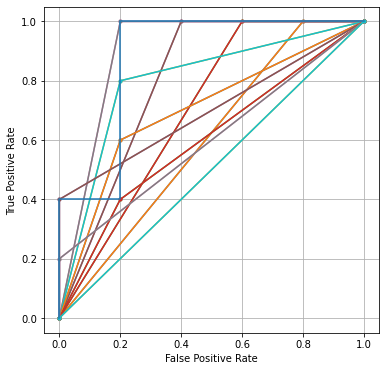

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

for i in x:

    real, pred = pd.Series(y), pd.Series(x > i)
 
    auc_r = roc_auc_score(real, pred)

    if auc_r > 0.5:
    
        lr_fpr, lr_tpr, _ = roc_curve(real, pred)

    else:
        lr_fpr, lr_tpr, _ = roc_curve(real.replace([0,1],[1,0]), pred)
        auc_r = roc_auc_score(real.replace([0,1],[1,0]), pred)

    #sns.set(style='white')
    
    plt.plot(lr_fpr, lr_tpr, marker='.', label = 'AUC ' + str(round(auc_r, 3)))
    plt.plot(lr_fpr, lr_tpr, marker='.')
    #plt.plot(lr_fpr, lr_fpr, linestyle='--')

#plt.legend(loc = 4)

fpr, tpr, _ = roc_curve(y,x)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
plt.grid()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [20]:

tpr

array([0. , 0.2, 0.4, 0.4, 1. , 1. ])